# Resolvendo o XOR com PyTorch

Este notebook é uma demonstração simples e direta de como as redes neurais podem resolver problemas não linearmente separáveis, como o clássico problema **XOR (OU Exclusivo)**.

O objetivo principal é visualizar as **fronteiras de decisão** aprendidas por dois modelos:
1.  Um modelo linear simples, que **falhará** em resolver o problema.
2.  Um Perceptron de Múltiplas Camadas (MLP) com uma camada oculta, que **terá sucesso**.

Isso ilustrará de forma clara a importância das camadas ocultas e das funções de ativação não lineares.

### 1. Configuração e Preparação dos Dados

Primeiro, vamos importar as bibliotecas necessárias e definir os dados do problema XOR. Também criaremos uma função auxiliar para plotar as fronteiras de decisão, que será o coração visual deste notebook.

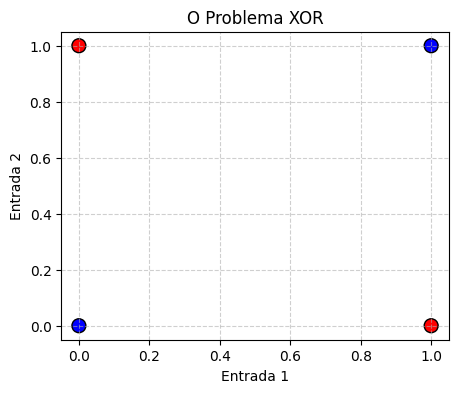

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Dados do problema XOR
# Entradas (features)
X = torch.tensor([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
], dtype=torch.float32)

# Rótulos (labels)
y = torch.tensor([
    [0.0],
    [1.0],
    [1.0],
    [0.0]
], dtype=torch.float32)

# Plot inicial dos dados
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='bwr', s=100, edgecolors='k')
plt.title("O Problema XOR")
plt.xlabel("Entrada 1")
plt.ylabel("Entrada 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Tentativa 1: Um Modelo Linear

Vamos começar com o modelo mais simples possível: uma única camada linear. Este modelo só consegue aprender fronteiras de decisão lineares (uma linha reta). Como o XOR não é linearmente separável, esperamos que este modelo falhe.

In [2]:
# Modelo com uma única camada linear
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # Mapeia 2 entradas para 1 saída
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

# Treinamento do modelo linear
linear_model = LinearModel()
# BCEWithLogitsLoss é mais estável numericamente que Sigmoid + BCELoss
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    # Forward pass
    outputs = linear_model(X)
    loss = criterion(outputs, y)

    # Backward e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Treinamento do modelo linear concluído. Perda final: {loss.item():.4f}")

# Avaliação
with torch.no_grad():
    predictions = torch.sigmoid(linear_model(X))
    print("\nPrevisões do Modelo Linear (probabilidades):")
    print(predictions)
    print("\nPrevisões Finais (arredondado):")
    print(torch.round(predictions))

Treinamento do modelo linear concluído. Perda final: 0.6931

Previsões do Modelo Linear (probabilidades):
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])

Previsões Finais (arredondado):
tensor([[0.],
        [0.],
        [0.],
        [0.]])


### Tentativa 2: Adicionando uma Camada Oculta

Agora, vamos adicionar uma camada oculta e uma função de ativação não linear (`ReLU`). Isso transforma nosso modelo em um Perceptron de Múltiplas Camadas (MLP), permitindo que ele aprenda fronteiras de decisão complexas e não lineares.

In [3]:
# Modelo MLP com uma camada oculta
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(2, 4) # 2 entradas, 4 neurônios na camada oculta
        self.layer2 = nn.Linear(4, 1) # 4 da oculta, 1 neurônio na saída

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x) # A BCEWithLogitsLoss aplica a sigmoid internamente
        return x

# Treinamento do modelo MLP
mlp_model = MLPModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs):
    outputs = mlp_model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Treinamento do modelo MLP concluído. Perda final: {loss.item():.4f}")

# Avaliação
with torch.no_grad():
    predictions = torch.sigmoid(mlp_model(X))
    print("\nPrevisões do Modelo MLP (probabilidades):")
    print(predictions)
    print("\nPrevisões Finais (arredondado):")
    print(torch.round(predictions))

Treinamento do modelo MLP concluído. Perda final: 0.0002

Previsões do Modelo MLP (probabilidades):
tensor([[3.3889e-05],
        [9.9991e-01],
        [9.9991e-01],
        [4.0434e-04]])

Previsões Finais (arredondado):
tensor([[0.],
        [1.],
        [1.],
        [0.]])
